## Figure 1b ##

This notebook contains the code for reproducing figure 1b. The recreated figures are stored inside the folder 'Fig1_figures'.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from sklearn.linear_model import LinearRegression

This graph is important because the regression slope was used as a performance criterion: the MNAV tasks were initiated after the slope exceeded 0.8.

In [2]:
file = pd.ExcelFile("Data_Fig1.xlsx")
df = pd.read_excel(file, sheet_name="fig_1b")
df.head() 

,nhp_id,va_mnav,vp_mnav,Unnamed: 3,nhp_id.1,va_mnav.1,vp_mnav.1
0,a,-0.65,-0.416667,NaN,m,2.60,1.483333
1,a,-0.65,-0.550000,NaN,m,0.65,0.783333
2,a,-1.95,-1.366666,NaN,m,2.60,2.233334
3,a,-1.95,-1.383333,NaN,m,1.95,2.416644
4,a,-1.95,-0.550000,NaN,m,0.65,0.833333


In [3]:
# Left block: Amadeus
a = df[['nhp_id', 'va_mnav', 'vp_mnav']]

# Right block: Mahler 
m = df[['nhp_id.1', 'va_mnav.1', 'vp_mnav.1']].rename(columns={'nhp_id.1':'nhp_id', 'va_mnav.1':'va_mnav', 'vp_mnav.1':'vp_mnav' })

a = a.dropna()
m = m.dropna()

In [4]:
def plot_1b(df_monkey, title, save, filename):

    X = df_monkey['va_mnav'].values.reshape(-1, 1)
    y = df_monkey['vp_mnav'].values

    model = LinearRegression().fit(X,y)
    slope = model.coef_[0]
    intercept = model.intercept_

    fig, ax = plt.subplots(figsize=(5,5))

    ax.scatter(df_monkey['va_mnav'], df_monkey['vp_mnav'],
               s=12, color='black', edgecolor='none', alpha=0.8)

    xx = np.linspace(-5, 5, 100).reshape(-1, 1)
    yy = model.predict(xx)
    ax.plot(xx, yy, color='red', linewidth=1)

    ax.plot([-5, 5], [-5, 5], '--', color='black', linewidth=1)

    ax.set_xlabel("Actual vector v_a (s)", fontsize=11)
    ax.set_ylabel("Produced vector v_p (s)", fontsize=11)

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    ax.tick_params(labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title(f"{title}\n$v_p = {slope:.2f} \\, v_a + {intercept:.2f}$",
                 fontsize=12, color='black', pad=12)

    fig.tight_layout()

    if save:
        os.makedirs('Fig1_figures', exist_ok=True)
        fig.savefig(f'Fig1_figures/{filename}.png', dpi=300, bbox_inches="tight")

    plt.show()
    plt.close(fig)

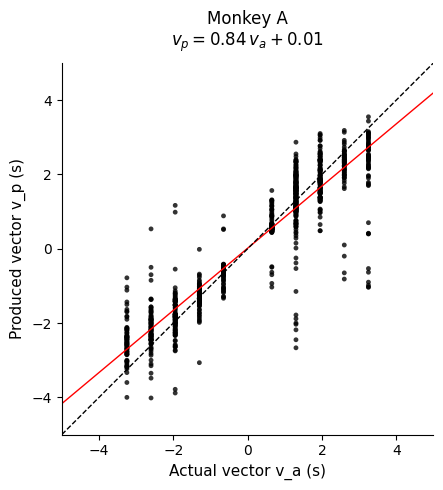

In [5]:
plot_1b(a,'Monkey A',save = True, filename = 'Fig1b_MonkeyA')

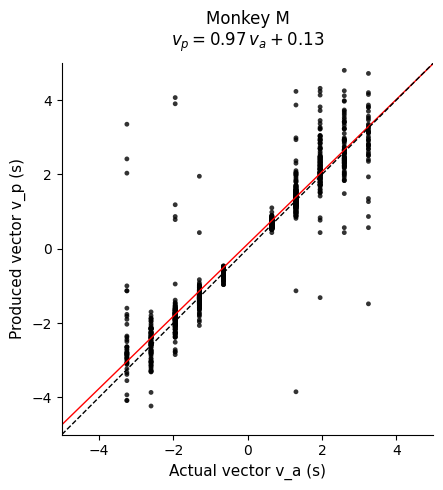

In [6]:
plot_1b(m,'Monkey M', save= True, filename = 'Fig1b_MonkeyM')